Based in the United States, PetMind is a retailer of pet products, offering a mix of luxury and everyday items. While luxury items include toys, everyday items include pet food. The company aims to increase sales by selling more everyday products repeatedly, and they require a report on the impact of repeat purchases on sales.

To provide insights, I compared repeat purchases across different categories by examining various metrics. Firstly, I looked at the percentage of repeat purchases, which measures the proportion of customers who made more than one purchase. Secondly, I examined revenue distribution, which helps to identify the top-selling products and categories. Thirdly, I analyzed revenue distribution across categories, which helps to understand which categories generate the most revenue. Fourthly, I evaluated the number of repeat purchases versus products that were only sold once to identify the products that customers are more likely to repurchase. Finally, I assessed the impact of repeat purchases on total sales, which provides insights into how much revenue is generated by repeat customers. By analyzing these metrics, I will provide a detailed report on how repeat purchases impact sales and provide recommendations to PetMind to increase their sales of everyday products. 

In [91]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

In [3]:
pets = pd.read_csv('pet_supplies_2212.csv')

In [4]:
pets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [5]:
pets['product_id'] = pets['product_id'].astype('category')

In [6]:
pets['category'] = pets['category'].astype('category')

In [7]:
pets['category'].value_counts()

Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
-             25
Name: category, dtype: int64

In [8]:
pets['category']= pets['category'].replace('-','Unknown')

In [9]:
pets['animal']= pets['animal'].astype('category')

In [10]:
pets['animal'].value_counts()

Cat     567
Fish    369
Dog     367
Bird    197
Name: animal, dtype: int64

In [11]:
pets['animal'].isna().sum()

0

In [12]:
pets['size'] = pets['size'].astype('category')

In [13]:
pets['size'].value_counts()

small     372
medium    233
Small     225
SMALL     157
Medium    150
large     122
MEDIUM    109
Large      75
LARGE      57
Name: size, dtype: int64

In [14]:
pets['size']=pets['size'].str.capitalize()

In [15]:
pets['size'].isna().sum()

0

In [16]:
pets['size']= pets['size'].astype('category')

In [17]:
pets['price'].head(25)

0         51.1
1        35.98
2        31.23
3        24.95
4        26.18
5        30.77
6        31.04
7         28.9
8        17.82
9        24.93
10       40.87
11       34.96
12       31.07
13        40.8
14       33.13
15       43.09
16       28.29
17       43.91
18       33.87
19          44
20    unlisted
21          41
22       32.98
23       22.99
24       38.99
Name: price, dtype: object

In [18]:
median_price = pets[pets['price'] != 'unlisted']

In [19]:
median_price.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,51.1,1860.62,7.0,1
1,2,Housing,Bird,Medium,35.98,963.60,6.0,0
2,3,Food,Dog,Medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,Small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


In [20]:
median_price.isna().sum()

product_id         0
category           0
animal             0
size               0
price              0
sales              0
rating             0
repeat_purchase    0
dtype: int64

In [21]:
median_price=median_price['price'].median()

In [22]:
pets['price']=pets['price'].replace('unlisted',median_price)

In [23]:
pets['price'].value_counts()

28.064999999999998    150
22.98                  13
28                     10
28.03                   8
19.94                   8
                     ... 
38.66                   1
36                      1
19.97                   1
39.19                   1
25.79                   1
Name: price, Length: 707, dtype: int64

In [24]:
pets['price'] = pets['price'].astype('float')

In [25]:
pets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   product_id       1500 non-null   category
 1   category         1500 non-null   category
 2   animal           1500 non-null   category
 3   size             1500 non-null   category
 4   price            1500 non-null   float64 
 5   sales            1500 non-null   float64 
 6   rating           1350 non-null   float64 
 7   repeat_purchase  1500 non-null   int64   
dtypes: category(4), float64(3), int64(1)
memory usage: 99.0 KB


In [26]:
pets['price']=pets['price'].replace('unlisted','28.1')

In [27]:
pets['price']=pets['price'].astype('float')

In [28]:
pets['price'] = round(pets['price'],2)

In [29]:
pets['price'].head()

0    51.10
1    35.98
2    31.23
3    24.95
4    26.18
Name: price, dtype: float64

In [30]:
pets[pets['rating']=='0']

,product_id,category,animal,size,price,sales,rating,repeat_purchase


In [ ]:
pets.info()

In [ ]:
pets['repeat_purchase']=pets['repeat_purchase'].astype('object')

In [32]:
pets['product_id'] = pets['product_id'].astype('category')

In [33]:
pets['sales']= round(pets['sales'],2)

In [34]:
pets['sales'].head(10)

0    1860.62
1     963.60
2     898.30
3     982.15
4     832.63
5     874.58
6     875.07
7    1074.31
8     503.67
9     838.88
Name: sales, dtype: float64

In [35]:
pets['sales'].describe()

count    1500.000000
mean      996.597847
std       323.952676
min       286.940000
25%       747.420000
50%      1000.830000
75%      1158.157500
max      2255.960000
Name: sales, dtype: float64

In [36]:
pets['sales'].isna().sum()

0

In [37]:
pets['animal'] = pets['animal'].astype('category')

In [38]:
pets['category'] = pets['category'].astype('category')

In [39]:
pets['repeat_purchase'] = pets['repeat_purchase'].astype('category')

In [40]:
pets['size'].head(20)

0      Large
1     Medium
2     Medium
3      Small
4      Small
5      Small
6      Small
7     Medium
8     Medium
9     Medium
10     Large
11    Medium
12    Medium
13     Large
14    Medium
15     Large
16     Small
17    Medium
18     Small
19     Large
Name: size, dtype: category
Categories (3, object): ['Large', 'Medium', 'Small']

In [41]:
pets['size'].value_counts()

Small     754
Medium    492
Large     254
Name: size, dtype: int64

In [42]:
pets['size']= pets['size'].str.capitalize()

In [43]:
pets['rating']

0       7.0
1       6.0
2       5.0
3       6.0
4       7.0
       ... 
1495    5.0
1496    5.0
1497    3.0
1498    5.0
1499    4.0
Name: rating, Length: 1500, dtype: float64

In [44]:
pets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   product_id       1500 non-null   category
 1   category         1500 non-null   category
 2   animal           1500 non-null   category
 3   size             1500 non-null   object  
 4   price            1500 non-null   float64 
 5   sales            1500 non-null   float64 
 6   rating           1350 non-null   float64 
 7   repeat_purchase  1500 non-null   category
dtypes: category(4), float64(3), object(1)
memory usage: 99.0+ KB


In [45]:
pets['animal'].value_counts()

Cat     567
Fish    369
Dog     367
Bird    197
Name: animal, dtype: int64

In [46]:
pets['sales'].describe()

count    1500.000000
mean      996.597847
std       323.952676
min       286.940000
25%       747.420000
50%      1000.830000
75%      1158.157500
max      2255.960000
Name: sales, dtype: float64

In [47]:
pets['category'].value_counts()

Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
Unknown       25
Name: category, dtype: int64

In [48]:
pets['category'] = pets['category'].replace('-','Unknown') 

In [49]:
pets['sales'].isna().sum()

0

In [50]:
pets[pets['sales'] <0]

,product_id,category,animal,size,price,sales,rating,repeat_purchase


In [51]:
pets['rating'].isna().sum()

150

In [52]:
pets['rating'] = pets['rating'].fillna('0')

In [53]:
pets['rating'] = pets['rating'].astype('int64')

In [54]:
pets['rating'].value_counts()

5    304
6    299
4    283
3    190
0    150
7    143
8     61
2     43
9     15
1     12
Name: rating, dtype: int64

In [55]:
pets['repeat_purchase'].value_counts()

1    906
0    594
Name: repeat_purchase, dtype: int64

In [56]:
pets['repeat_purchase'] = pets['repeat_purchase'].astype('category')

In [57]:
pets['repeat_purchase'].isna().sum()

0

In [81]:
pets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   product_id       1500 non-null   category
 1   category         1500 non-null   category
 2   animal           1500 non-null   category
 3   size             1500 non-null   object  
 4   price            1500 non-null   float64 
 5   sales            1500 non-null   float64 
 6   rating           1500 non-null   int64   
 7   repeat_purchase  1500 non-null   category
dtypes: category(4), float64(2), int64(1), object(1)
memory usage: 99.0+ KB


Introduction:
The dataset used in this report consisted of 8 columns: product_id, category, animal, size, price, sales, rating, and repeat_purchase. The purpose of this first task was to clean and prepare the data for analysis.



1a)
Product_id: The values do not match the description given in the table. 
I only needed to change the datatype from object to category to improve the performance of the analysis and save memory—the category data type was designed to represent categorical variables specifically.

Category: The values do not match the description given in the table. I converted the data type from an object to a categorical data type.
I found 25 missing values in the form of a hyphen and had to replace them with the character 'Unknown' as described in the table. 

Animal: I only needed to convert the data type from object to category.

Size: I had to change the formatting of the three categories, small, medium and large, as it was not consistent throughout the rows, and I had to change the data type from object to category. 


Price: The dataset's values did not match those described in the table. I had to replace the word 'unlisted' from the rows, replace it with the overall median price and convert it from the data type object to a float. 

Sales: We needed no changes in the sales column.

Rating: We had to change the data type to integer and fill in missing values with 0.

Repeat_purchase: the column had the wrong data type, and I converted it to the category data type. 




1b) 

Product_id: The column had no missing values. 

Category: I found 25 missing rows in the form of a hyphen. 
Animal:  The column had all the values. 
Size: The column had no missing values. 
Price: The column had 150 missing values in the form of the word 'unlisted'.
Sales: The column had all the values.
Rating: The column had 150 missing values.
Repeat_purchases:  The column had no missing values. 
1c) 

Product_id: I changed the column's datatype from object to category to match the description, and I used the function astype() to convert the datatype from object to category.
i.e pets['product_id'] = pets['product_id'].astype('category') 
Then to permanently change it in the table, I assigned the change to the column. 


Category: I changed the datatype from object to category using the astype() function. I used the value_counts() function to check if all six categories were present in the column and found 25 missing rows. 
I used the replace() function to replace the rows in the Category columns with the sign '-' to 'Unknown'. 


Animal: I only needed to convert the datatype from object to category for the animal column. Everything else was good.

Size: I had to make a few changes to the size column. 

- I converted the datatype from object to category.
- I used the str.capitalize() function to give all three categories the same formatting.


Price: For the price column, I had to replace the unlisted character with the overall median price and convert the datatype from object to float using the type() function 

I will explain what I did with the help of my code. 

1.medium_price=pets[pets['price']!='unlisted']

I filtered out the word 'unlisted' from the price column in the table pets and assigned it to a new table that I called median_price. 

2.median_price['price']=median_price['price'].astype('float')

I converted the data type of the price column from object to float using the astype() function and saved it in the price column in the table median_price. 

3.medium_price=medium_price['price'].median()

I used the median() function to get the overall median price and assigned it to median_price.

4.pets['price']= pets['price'].replace('unlisted',median_price)

I replaced the word unlisted with the median_price $28.1 in the pets table. 

5. pets['price']= pets['price'].astype('float')

I converted the data type from object to float in the price column of the pets table. 

6.pets['price']=round(pets['price'],2)

I rounded all numbers to two decimal places. 


Sales: All values were found to be accurate in the sales column, and no modifications were necessary. However, all sales values were rounded to two decimal places using the round() function to ensure the values matched the description in the table. 


Rating: I found 150 missing rows and used the fillna() function to replace all missing values with 0. 
Then I changed the datatype from float to integer according to the description. 


Repeat_purchase: I converted the datatype from integer to category using the astype() function.

In [59]:
pets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   product_id       1500 non-null   category
 1   category         1500 non-null   category
 2   animal           1500 non-null   category
 3   size             1500 non-null   object  
 4   price            1500 non-null   float64 
 5   sales            1500 non-null   float64 
 6   rating           1500 non-null   int64   
 7   repeat_purchase  1500 non-null   category
dtypes: category(4), float64(2), int64(1), object(1)
memory usage: 99.0+ KB


In [60]:
pets['repeat_purchase'] = pets['repeat_purchase'].astype('int')

In [61]:
category=pets.groupby('category')['repeat_purchase'].agg(['sum','count'])
category['% repeat purchase'] = round((category['sum']/category['count'])*100,2)
category

,sum,count,% repeat purchase
category,,,
Unknown,14,25,56.00
Accessory,70,126,55.56
Equipment,221,370,59.73
Food,151,260,58.08
Housing,152,227,66.96
Medicine,153,237,64.56
Toys,145,255,56.86


The analysis results showed that the Housing and Medicine categories were the clear leaders in repeat purchases, with more than 64% of their products purchased multiple times. These categories took the top two spots in our rankings. On the other hand, the Accessory category showed relatively lower results, with only 55% of its products being repeat purchases, indicating that 45% of its products were not bought again by customers.


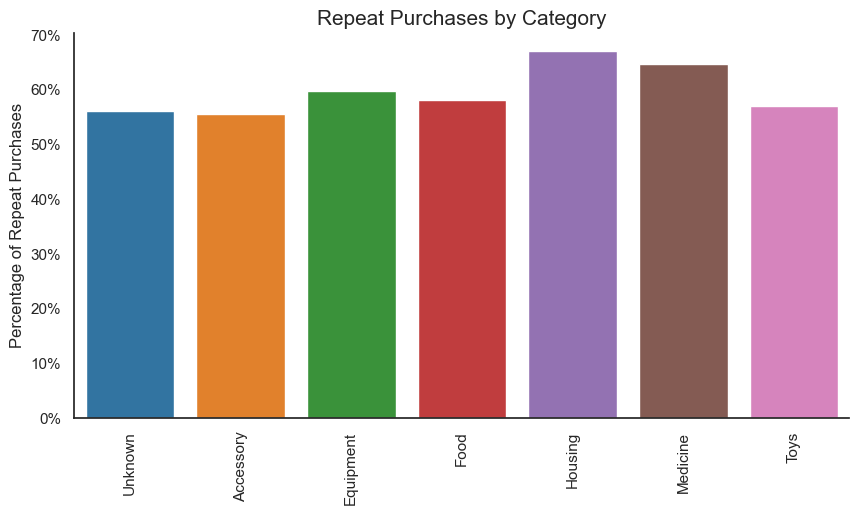

In [82]:
plt.figure(figsize=(10,5))
sns.set_style("white")
sns.set_context('notebook')
sns.barplot(data=category,x=category.index,y='% repeat purchase')
plt.ylabel('Percentage of Repeat Purchases')
plt.xlabel('')
plt.title('Repeat Purchases by Category',size=15)
plt.xticks(rotation=90)
plt.yticks([0,10,20,30,40,50,60,70],['0%','10%','20%','30%','40%','50%','60%','70%'])
sns.despine()


plt.show()

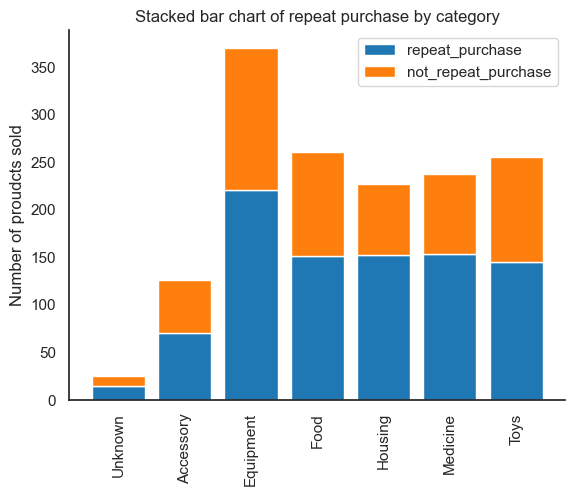

In [83]:
x=category.index
y1=category['sum']
y2=category['count']-category['sum']

fig, ax = plt.subplots()
ax.bar(x, y1, label='repeat_purchase')
ax.bar(x, y2, bottom=y1, label='not_repeat_purchase')

ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('Stacked bar chart of repeat purchase by category')
ax.legend()
plt.xticks(rotation=90)
plt.ylabel('Number of proudcts sold')
plt.xlabel('')

sns.despine()
plt.show()





I used a stacked bar graph to compare the relative proportion of repeat and non-repeat purchases. Stacked bar graphs are helpful when you want to show the breakdown of the total size into smaller components and how each component contributes to the whole. 

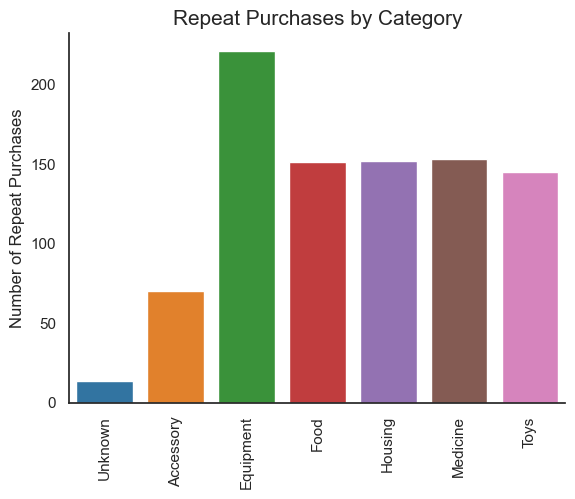

In [84]:
sns.set_style("white")
sns.set_context('notebook')
sns.barplot(data=category,x=category.index,y='sum')
plt.ylabel('Number of Repeat Purchases')
plt.xlabel('')
plt.title('Repeat Purchases by Category',size=15)
plt.xticks(rotation=90)
sns.despine()

plt.show()

I used a bar graph to demonstrate the number of products in each category that were repeat purchases. The bar graph is well-suited for comparing the magnitude of different categories and is user-friendly for non-technical audiences.

PetMind experienced significant repeat purchases in the Equipment category, with 221 items purchased multiple times by customers. This category emerged as number one in repeat purchases, outpacing other categories such as food, housing, medicine, and toys, with repeat purchases ranging from 145 to 151 products. The Accessory category could have been better in repeat purchases, with only 70 products being purchased multiple times. The data for the unknown category cannot be analyzed or categorized; therefore, it is impossible to draw any conclusions from it. In conclusion, the Equipment category is a strong performer in repeat purchases. This information gives PetMind the insight to pay further attention to the Equipment category and increase its investment to capitalize on this trend. 

The Accessory category needs to be further analyzed to look at the products that are not selling very well and invest in the few that do well. Products that don't sell multiple times don't meet the customer's expectations. We need to investigate further why customers are not happy with the product. Is the price too high? Or
maybe the product has a malfunction? Or are there 
better alternatives to the product in the market that PetMind might need to be made aware of? 


The observations across the Food, Toys, Housing and medicine categories were relatively balanced. To increase sales in the Food category, diving deeper and taking a closer look at the products that sell well and those that don't sell multiple times will give us an idea of what to change to increase sales in the category. 

To understand our customers better, I suggest joining online communities of pet lovers on popular platforms such as Reddit and Facebook. By participating in these communities, we will have the opportunity to listen to pet owners discuss various topics related to pet products, including the latest releases, products that did not meet their expectations, and their favourite products. The information will give us valuable insights into the needs and preferences of our target audience, allowing us to make informed decisions about our product offerings and better meet the needs of our customers.


A thorough analysis of the product ratings and average prices is crucial as the cost of the product has a significant impact on the purchasing decisions of customers.

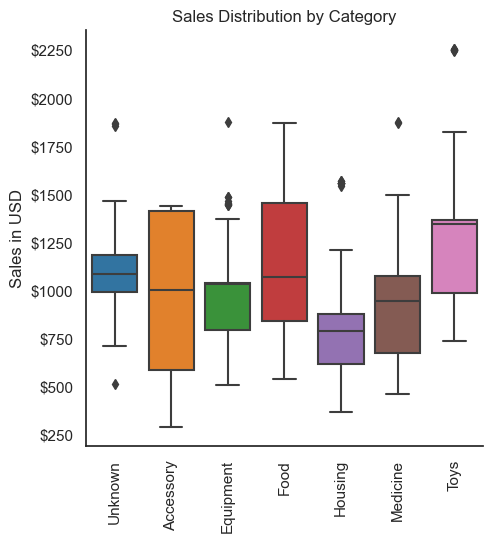

In [65]:
sns.catplot(kind='box',x='category',y='sales',data=pets,whis=1.5)
plt.xticks(rotation=90)
plt.title('Sales Distribution by Category')
plt.yticks([250,500,750,1000,1250,1500,1750,2000,2250],['$250','$500','$750','$1000','$1250','$1500','$1750','$2000',
 '$2250'])
plt.ylabel('Sales in USD')
plt.xlabel('')
plt.show()

The Accessory category had the largest interquartile range, indicating a large variation in sales between its products. The Housing category had the lowest median sales among all categories, and most categories had outliers except for Food and Accessories. The Food category had a relatively large interquartile range and the second-largest median sales among the categories. This highlights the potential for greater revenue by focusing on high-selling products and reducing investment in low-selling ones."





In [66]:
pets.groupby('category')['sales'].agg(['mean','sum','median','count']).sort_values('sum',ascending=False)

,mean,sum,median,count
category,,,,
Equipment,942.906054,348875.24,1028.285,370
Toys,1254.498431,319897.10,1341.720,255
Food,1104.377538,287138.16,1068.515,260
Medicine,903.233122,214066.25,941.390,237
Housing,772.380220,175330.31,783.840,227
Accessory,962.487619,121273.44,997.115,126
Unknown,1132.650800,28316.27,1085.020,25


In [67]:
pets.groupby('category')['sales'].agg(['mean','median','sum']).sort_values(by='sum',ascending=False)

,mean,median,sum
category,,,
Equipment,942.906054,1028.285,348875.24
Toys,1254.498431,1341.720,319897.10
Food,1104.377538,1068.515,287138.16
Medicine,903.233122,941.390,214066.25
Housing,772.380220,783.840,175330.31
Accessory,962.487619,997.115,121273.44
Unknown,1132.650800,1085.020,28316.27


In [68]:
pets['sales'].describe()


count    1500.000000
mean      996.597847
std       323.952676
min       286.940000
25%       747.420000
50%      1000.830000
75%      1158.157500
max      2255.960000
Name: sales, dtype: float64

In [69]:
pets['sales'].mode()

0    1034.36
Name: sales, dtype: float64

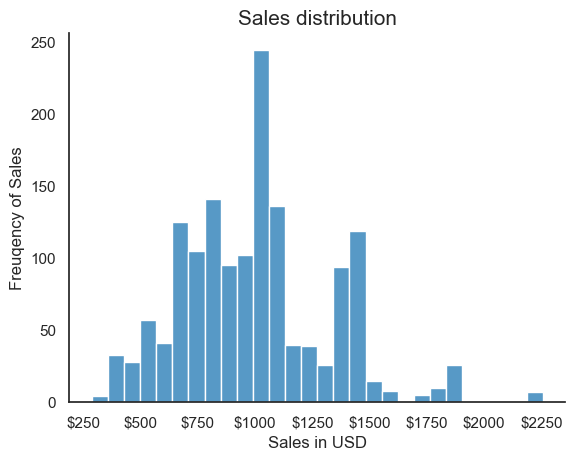

In [85]:
sns.set_style('white')
sns.histplot(data=pets,x='sales')
plt.title('Sales distribution',size=15)
plt.ylabel('Freuqency of Sales')
plt.xticks([250,500,750,1000,1250,1500,1750,2000,2250],['$250','$500','$750','$1000','$1250','$1500','$1750','$2000',
                                                        '$2250'])
plt.xlabel('Sales in USD')
sns.despine()
plt.show()

Central tendency: 
The average sale for a product is around 996 USD, the mode is close to 1034 USD, and the median is 1000 USD. This suggests that the product has a relatively stable sales distribution.

Outliers: Few products sell exceptionally well relative to other products. 

Distribution: The sales distribution is slightly right-skewed, meaning there are more lower sales values than higher sales values.

Spread: The sales spread was determined using the standard deviation, which is around 323 USD. This highlights that the values in the sales column are spread out over a wide range. This spread indicates that there is a significant amount of variability in the sales of the product.



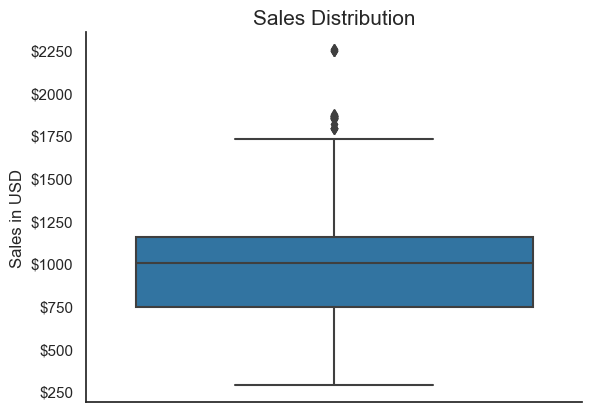

In [86]:
sns.boxplot(data=pets,y='sales',whis=1.5)
plt.title('Sales Distribution',size=15)
plt.yticks([250,500,750,1000,1250,1500,1750,2000,2250],['$250','$500','$750','$1000','$1250','$1500','$1750','$2000',
'$2250'])
plt.ylabel('Sales in USD')
sns.despine()
plt.show()

I utilized a  box plot to efficiently summarize the sales column in the pets table and identify outliers. The whisker was set at 1.5 to detect outliers, and I found several outliers that skewed the average sales to the right, as observed in the histogram. The interquartile range was 411 USD, indicating a significant disparity between the sales of products in the 25th percentile and those in the 75th percentile. The minimum sale by a product was 286.94 USD, and the maximum sale by a product was 2225 USD, resulting in a range of nearly 1939 USD, showcasing the considerable variation in sales between different products. The median sale was 1000 USD.

In [72]:
pets['sales'].describe()

count    1500.000000
mean      996.597847
std       323.952676
min       286.940000
25%       747.420000
50%      1000.830000
75%      1158.157500
max      2255.960000
Name: sales, dtype: float64

In [73]:
relation=pets.groupby('repeat_purchase')['sales'].sum().reset_index()
relation

,repeat_purchase,sales
0,0,610850.60
1,1,884046.17


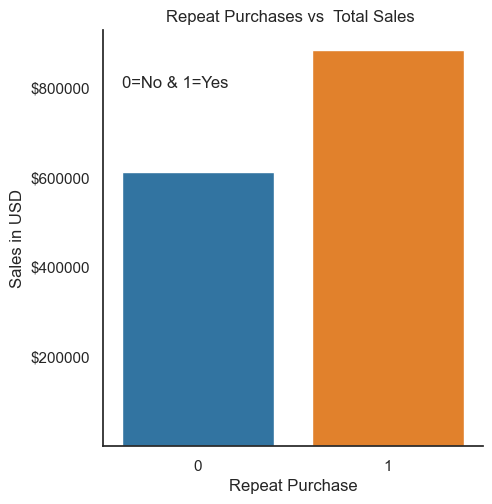

In [74]:

sns.set_context('notebook')
sns.catplot(data=relation,x='repeat_purchase',y='sales',kind='bar',ci=None)
plt.title('Repeat Purchases vs  Total Sales ')
plt.yticks([200000,400000,600000,800000],['$200000','$400000','$600000','$800000'])
plt.ylabel('Sales in USD')
plt.xlabel('Repeat Purchase')
plt.text(-.4,800000,'0=No & 1=Yes')

plt.show()

PetMind Sales Report:
 
My analysis of the relationship between sales and repeat purchases revealed that the company sold more repurchased items (906) than non-repurchased items (595). Despite the higher number of repurchased items, the average sales for non-repurchased items were higher than for repurchased items. This could indicate that customers had higher expectations based on the higher price they paid, but we can't say that with certainty until further analysis. 
The total sales for repurchased items were $884,046, while the total for non-repurchased items was $610850. This result can be attributed to the fact that customers are more likely to repurchase a product that they are satisfied with and that meets their expectations. 
Overall, the results of the sales analysis indicate that PetMind's strategy of offering high-quality products that meet customer expectations is successful. However, there is also room for improvement, as the higher average sales for non-repurchased items suggest that some customers may not have been completely satisfied with those products. PetMind may consider this in its future product development and customer satisfaction efforts.
In conclusion, PetMind's sales analysis provides valuable insights into the company's performance and customer satisfaction. By continuing to offer high-quality products that meet customer expectations and address customer dissatisfaction, PetMind can increase sales and build a loyal customer base. 

In [75]:
Agg=pets.groupby('repeat_purchase')['sales'].agg(['mean','count','median','sum'])
Agg

,mean,count,median,sum
repeat_purchase,,,,
0,1028.368013,594,1030.185,610850.60
1,975.768400,906,978.210,884046.17


In [76]:
pets['repeat_purchase']=pets['repeat_purchase'].astype('category')

In [77]:
Agg=pets.groupby('repeat_purchase')['sales'].count().reset_index()
Agg

,repeat_purchase,sales
0,0,594
1,1,906


<Figure size 1200x500 with 0 Axes>

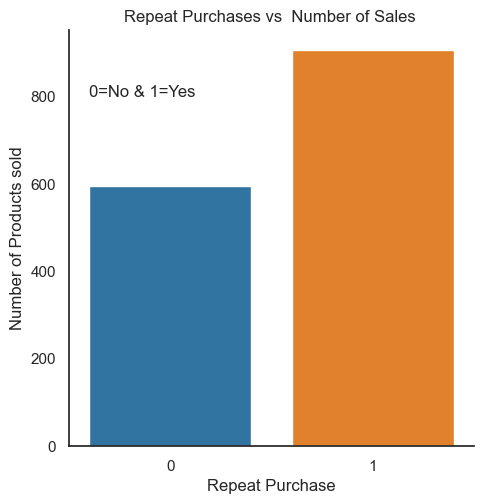

In [89]:
plt.figure(figsize=(12,5))
sns.set_context('notebook')
sns.catplot(data=Agg,x='repeat_purchase',y='sales',kind='bar',ci=None)
plt.title('Repeat Purchases vs  Number of Sales ')
plt.ylabel('Number of Products sold')
plt.xlabel('Repeat Purchase')
plt.text(-.4,800,'0=No & 1=Yes')


plt.show()

I utilized a  bar graph to display the number of products that customers purchased again versus those only sold once. I found out that 594 products were not repurchased, highlighting a significant opportunity for PetMind to increase its sales by investing in well-liked products and reducing the inventory of low-selling ones.

In [79]:
pets.sort_values('sales',ascending=False).head(10)

,product_id,category,animal,size,price,sales,rating,repeat_purchase
1442,1443,Toys,Bird,Large,54.07,2255.96,8,1
652,653,Toys,Bird,Large,54.02,2254.99,8,0
294,295,Toys,Bird,Large,54.05,2249.40,4,0
39,40,Toys,Bird,Large,54.03,2248.63,5,0
448,449,Toys,Bird,Large,54.16,2248.04,8,1
466,467,Toys,Bird,Large,53.97,2246.77,8,1
1104,1105,Toys,Bird,Large,54.07,2244.67,6,1
1416,1417,Equipment,Bird,Large,48.00,1873.47,3,1
458,459,Medicine,Bird,Large,45.06,1871.35,8,0
164,165,Food,Bird,Large,51.18,1869.97,6,1


In [92]:
pets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   product_id       1500 non-null   category
 1   category         1500 non-null   category
 2   animal           1500 non-null   category
 3   size             1500 non-null   object  
 4   price            1500 non-null   float64 
 5   sales            1500 non-null   float64 
 6   rating           1500 non-null   int64   
 7   repeat_purchase  1500 non-null   category
dtypes: category(4), float64(2), int64(1), object(1)
memory usage: 99.0+ KB
